# Índice
- [Introducción](#introducción)
- [Librerías Utilizadas](#librerias)
- [Análisis Exploratorio](#exploratory) 
- [Hipótesis](#hip)
  - [Hipótesis 1: Relación entre variables](#hip1)
  - [Hipótesis 2: Caracterizacion por tipo](#hip2)
    - [Hipótesis 2.1: Variables para riesling](#hip2.1)
    - [Hipótesis 2.2: Variables para garnacha](#hip2.2)
  - [Hipótesis 3: Impacto de variable citric acid](#hip3)
  - [Hipótesis 4: Impacto de variable volatile acidity](#hip4)
- [Resultados](#resultados)
- [Conclusión](#conclusión)


# Introducción <a id="introducción"></a>
El objetivo de esta presentacion es llevar a cabo un analisis de datos sobre el dataset  "winequality_BR.csv" aplicando analisis exploratorio de datos para realizar una identificacion de los datos utiles de estudio y "limpiar" del dataset aquellos que no tienen un aporte significativo o sean datos en mal estado. Posteriormente mediante el uso de los metodos y herramientas de analisis tratados en la catedra se realiza un estudio sobre varias hipotesis. 

El dataset de analisis "winequality_BR.csv" nos presenta datos acerca de dos variedades de vino uno de variedad blanca el Riesling y otro tinto Garnacha con distintas . Ademas nos brinda varias variables numericas cuantitativas y una variable de calidad.

Haciendo uso de conocimiento del dominio y los datos disponibles hay ciertas hipotesis que nos son de interes de estudio 

- hipotesis 1: La calidad de un vino esta dada de manera independiente al volumen alcoholico del mismo, se dice que este es un valor objetivo y no se utiliza como un factor relevante a la hora de asignar la calidad ♥

- hipotesis 2: Los factores que caracterizan a un vino deberian ser distintos en dependencia del tipo de vino. ♥

    - hipotesis 2.1: Las variables total sulfur dioxide, residual sugar, y citric acid aumentan la probabilidad de que el vino sea Riesling. ♥

    - hipotesis 2.2: Mientras que las variables alcohol y density favorecen la clasificación de Garnacha. ♥

- hipotesis 3: El acido citrico no impacta en la calidad de los vinos rieslings pero no asi en los vinos garnacha ♥

- hipotesis 4: El ácido volátil no impacta en la calidad del vino de la misma manera para los distintos tipos

    - hipotesis 4.1: La ácido volátil influye en la calidad del vino Garnacha

    - hipotesis 4.2: La ácido volátil no influye en la calidad del vino Riesling



## Conclusión <a id="conclusión"></a>
Aquí se presentan las conclusiones.


# Librerias Utilizadas <a id="librerias"></a>
Aquí va la descripción de las librerias utilizadas.

In [396]:
 # importamos wget y las librerías que nos faltan

from os import path
from wget import download
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report



##### Cargamos el dataframe "winequiality_BR.csv"

In [397]:

#https://github.com/agustinbx/DataSet-Trabajo/winequality_BR.csv



# descargamos la base de datos
if not path.exists("winequality_BR.csv"):
  download("https://github.com/agustinbx/DataSet-Trabajo/raw/main/winequality_BR.csv")
else:
  print("File already exists!")

File already exists!


# Analisis Exploratorio <a id="exploratory"></a>
Se realiza analisis exploratorio de datos

In [398]:
raw_ds = pd.read_csv("winequality_BR.csv", delimiter=';')
winesDf = raw_ds.copy()
winesDf

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Riesling,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,NaN,NaN,NaN
1,Riesling,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,NaN,NaN,NaN
2,Riesling,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,NaN,NaN,NaN
3,Riesling,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,NaN,NaN,NaN
4,Riesling,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Garnacha,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,NaN,NaN,NaN
3228,Garnacha,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,NaN,NaN,NaN
3229,Garnacha,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6,NaN,NaN,NaN
3230,Garnacha,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,NaN,NaN,NaN


Elimino las columnas que son nulas y las id ya que son innecesarias y complican el analisis

In [399]:
winesDf= winesDf.dropna(axis=1,how="all")
winesDf

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Riesling,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,Riesling,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,Riesling,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,Riesling,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,Riesling,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Garnacha,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
3228,Garnacha,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
3229,Garnacha,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6
3230,Garnacha,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Inicio el analisis de los datos, primero necesito saber con que tipos de datos estoy trabajando y si estan en buen estado. ademas necesito saber si tengo valores faltantantes por lo que tambien corroboro que valores nulos tengo.

In [400]:
winesDf.isna().sum() #con esta linea de codigo verifico cuantos valores nulos tenemos en el csv y los sumo

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Este resultado indica que no hay valores NaN en el csv. Por lo que continuo con el analisis de columnas.

### Descripcion de las columnas
type: tipo de uva con la que se elabora el vino. 

fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
La variable fixed acidity contiene el conjunto de acidos naturales presentes en el vino (incluyendo al acido citrico). Estos no son acidos volatiles, sino que son acidos naturales que aportan al balance de acidez y el gusto del vino. medida en gramos por litro.

volatile acidity: La acidez volatil, son aquellos acidos volatiles o gaseosos presentes en el vino. valores normales los situan entre 0.3 g/l y 0.6 g/l. En general si este valor sobrepasa 1 g/l se suele indicar que el vino esta "picado", es decir presenta ciertos aromas y gustos avinagrados desagradables. Medida en gramos por litro.

citric acid: El acido citrico es uno de los acidos naturales que se pueden encontrar en el vino y es tambien parte de los acidos que componen la fixed acidity. Este le aporta al vino sabores citricos. Medido en gramos por litro.

residual sugar: El azucar residual es azucar libre en el vino que no se descompuso para formar alcohol. Esta es responsable del dulzor del vino. Esta pueden clasificar el vino en seco (0-9), semiseco (9-18), semidulce (18-50) y dulce (mayor 50). Medida en gramos por litro. 

chlorides: Los cloruros son la concentracion de sales minerales presentes en el vino y que pueden afectar a su calidad y sabor, medida en gramos por litro.

free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 

total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.

density: La densidad de un vino es percibida como la estructura del vino o espesor en boca. Este valor suele ser similar a la densidad del agua que ronda los 1g/ml, medida en gramos por mililitro.

pH: medida de la acidez o alcalinidad del vino. 

sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro.

alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).

quality: puntuación del vino, con una escala que va de 0 a 10.

In [401]:
winesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   object 
 12  quality               3232 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.4+ KB


De aca podemos ver que hay un problema con el alcohol ya que es de tipo object y no float64 como deberia.

Analizando el dataset se hallaron 6 filas donde el alcohol esta mal representado y pandas no sabe como interpretar el valor ya que no corresponde a un tipo numerico, figuran valores como el siguiente:
                                                                
- Garnacha;11.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65; 100.333.333.333.333 ;6;;;

Siendo que son pocos valores remplazo la columna erronea por la media.


In [402]:
#convierto los datos erroneos en NaN
winesDf["alcohol"] = pd.to_numeric(winesDf["alcohol"],errors='coerce')

#calculo el promedio de % de volumen alcoholico entre los vinos de los cuales si tengo los datos
prom = winesDf['alcohol'].mean()
winesDf['alcohol'].fillna(prom,inplace= True)
# Detectar valores incorrectos en la columna 'alcohol' (más de un punto)
#winesDf.loc[winesDf['alcohol'].str.contains(r'\.\d+\.\d+', na=False), 'alcohol'] = 10.0
#winesDf["alcohol"] = pd.to_numeric(winesDf["alcohol"],errors='coerce')
winesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   float64
 12  quality               3232 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 328.4+ KB


/tmp/ipykernel_3844/1551503695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winesDf["alcohol"] = pd.to_numeric(winesDf["alcohol"],errors='coerce')
/tmp/ipykernel_3844/1551503695.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  winesDf['alcohol'].fillna(prom,inplace= True)
/tmp/

Arreglado los tipos ahora pruebo si hay algun valores por fuera de la norma

In [403]:
winesDf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.00000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,7.664851,0.402614,0.318654,4.303697,0.066740,25.460705,95.52367,1.675952,3.258085,0.571235,10.355998,5.760210
std,1.520589,0.191189,0.175392,4.074992,0.042285,16.731790,62.29632,7.067230,0.163933,0.168402,1.098240,0.883699
min,4.600000,0.080000,0.000000,0.800000,0.012000,1.000000,6.00000,0.988150,2.740000,0.250000,8.400000,3.000000
25%,6.700000,0.250000,0.217500,1.800000,0.043000,12.000000,38.00000,0.993600,3.140000,0.460000,9.500000,5.000000
50%,7.300000,0.350000,0.320000,2.300000,0.059000,23.000000,91.00000,0.995800,3.260000,0.550000,10.100000,6.000000
75%,8.200000,0.540000,0.440000,5.400000,0.080000,35.000000,144.00000,0.997400,3.370000,0.650000,11.000000,6.000000
max,15.900000,1.580000,1.660000,23.500000,0.611000,131.000000,366.50000,100.369000,4.010000,2.000000,14.900000,9.000000


Desde los datos solo puedo hallar una columna con problemas siendo esta la densidad que tiene valores maximos desorbitados. Analizando los datos los valores eran pocos asi que remplazo por la media.  

Viendo que salvo el pH todos la mayoria de valores cuantitativos estan en unidades de g/l a excepcion de la densidad que esta en g/mg el dioxido de azufre libre y el dioxido de azufre total que estan en mg/l. Me conviene pasar estos dos ultimos a unidades de g/l para facilitar nuestro analisis.

In [404]:
winesDf['free sulfur dioxide'] = winesDf['free sulfur dioxide'] / 1000
winesDf['total sulfur dioxide'] = winesDf['total sulfur dioxide'] / 1000
winesDf

/tmp/ipykernel_3844/3673319427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winesDf['free sulfur dioxide'] = winesDf['free sulfur dioxide'] / 1000
/tmp/ipykernel_3844/3673319427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winesDf['total sulfur dioxide'] = winesDf['total sulfur dioxide'] / 1000


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Riesling,7.0,0.270,0.36,20.7,0.045,0.045,0.170,1.00100,3.00,0.45,8.8,6
1,Riesling,6.3,0.300,0.34,1.6,0.049,0.014,0.132,0.99400,3.30,0.49,9.5,6
2,Riesling,8.1,0.280,0.40,6.9,0.050,0.030,0.097,0.99510,3.26,0.44,10.1,6
3,Riesling,7.2,0.230,0.32,8.5,0.058,0.047,0.186,0.99560,3.19,0.40,9.9,6
4,Riesling,7.2,0.230,0.32,8.5,0.058,0.047,0.186,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Garnacha,6.2,0.600,0.08,2.0,0.090,0.032,0.044,0.99490,3.45,0.58,10.5,5
3228,Garnacha,5.9,0.550,0.10,2.2,0.062,0.039,0.051,0.99512,3.52,0.76,11.2,6
3229,Garnacha,6.3,0.510,0.13,2.3,0.076,0.029,0.040,0.99574,3.42,0.75,11.0,6
3230,Garnacha,5.9,0.645,0.12,2.0,0.075,0.032,0.044,0.99547,3.57,0.71,10.2,5


La densidad tiene valores anormalmente altos asi que los hallamos y corregimos. Elegimos utilizar el valor de la media de las columnas ya que eran pocos valores. 


In [405]:
winesDf.loc[winesDf['density'] > 2, 'density'] = np.nan
mean_density = winesDf['density'].mean()
winesDf['density'].fillna(mean_density, inplace=True)
winesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   float64
 12  quality               3232 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 328.4+ KB


/tmp/ipykernel_3844/3251030495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  winesDf['density'].fillna(mean_density, inplace=True)
/tmp/ipykernel_3844/3251030495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winesDf['density'].fillna(mean_density, inplace=True)


#### Visualizacion de datos
Con la curaduria de datos ya resuelta, procedemos a ver y estudiar individualmente los datos que tenemos para saber como estan distribuidos y como se relacionan entre ellos.

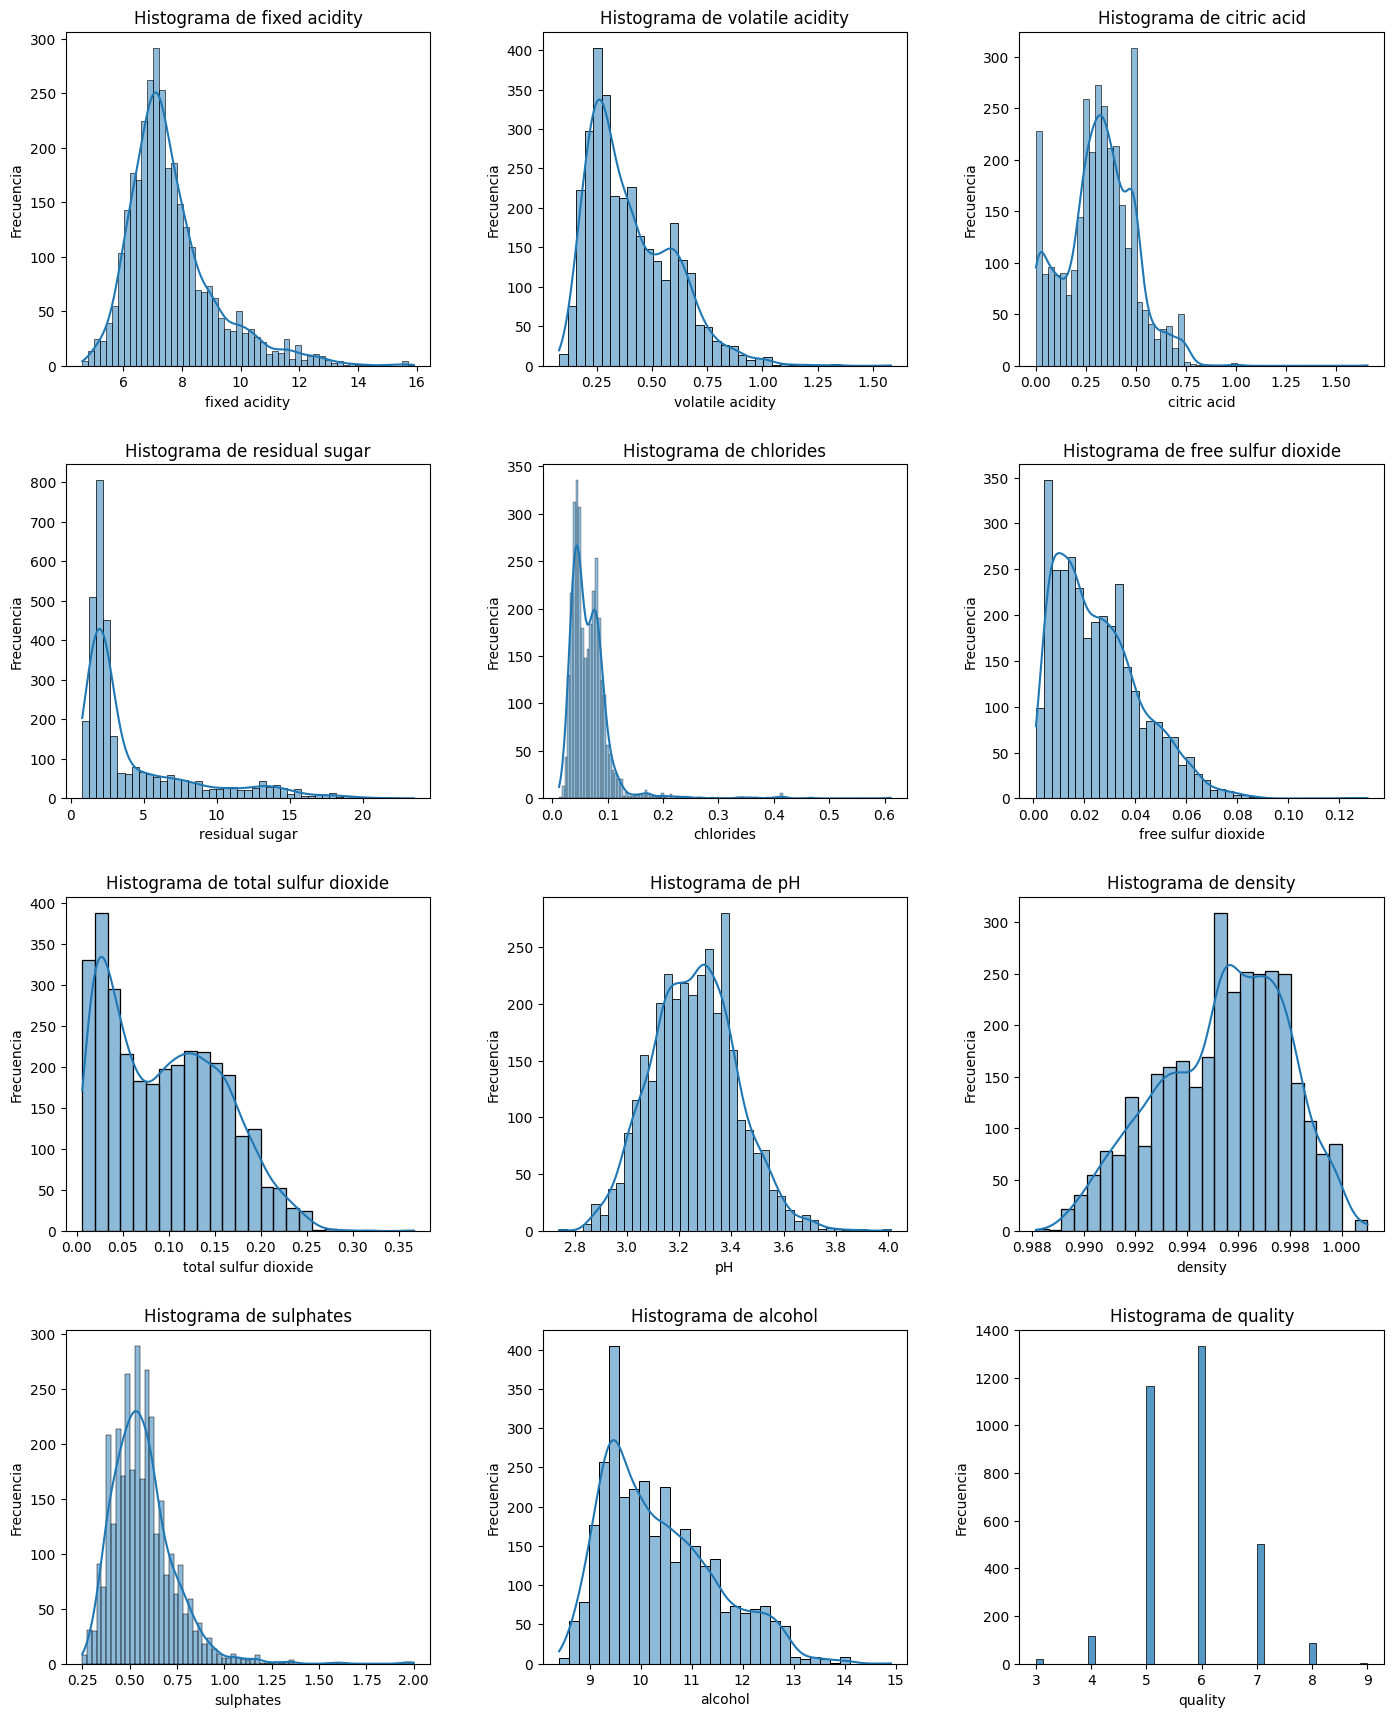

In [406]:
# Configuramos la cuadrícula de subgráficos
fig, axes = plt.subplots(4, 3, figsize=(15, 18))  # 4 filas y 3 columnas para 12 gráficos en total
fig.tight_layout(pad=5.0)  # Espacio entre gráficos

#Columnas y títulos
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'pH', 'density', 
    'sulphates', 'alcohol', 'quality'
]
titles = [
    "Histograma de fixed acidity", "Histograma de volatile acidity", "Histograma de citric acid", 
    "Histograma de residual sugar", "Histograma de chlorides", "Histograma de free sulfur dioxide", 
    "Histograma de total sulfur dioxide", "Histograma de pH", "Histograma de density", 
    "Histograma de sulphates", "Histograma de alcohol", "Histograma de quality"
]

# Dibuja cada histograma en una subfigura
for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i // 3, i % 3]  # Selecciona el subgráfico en la cuadrícula
    if col == 'quality':
        sns.histplot(winesDf[col], kde=False, ax=ax)  # Sin kde para quality
    else:
        sns.histplot(winesDf[col], kde=True, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)

plt.show()


En las Histograma se puede ver que la mayoria de las distribuciones parecieran ser normales y no demasiados valores atipicos

In [407]:
# Generamos la matriz de correlacion, teniendo en cuenta unicamente valores numericos
numeric_data = winesDf.select_dtypes(include=[np.number])
#numeric_data = numeric_data.dropna()
correlation_matrix = numeric_data.corr()

correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.126716,0.394672,-0.141115,0.259318,-0.320718,-0.368046,0.426108,-0.367687,0.308982,-0.004170,-0.017376
volatile acidity,0.126716,1.000000,-0.499696,-0.244183,0.358063,-0.395617,-0.471719,0.320972,0.284583,0.203200,-0.055407,-0.320769
citric acid,0.394672,-0.499696,1.000000,0.216785,0.007385,0.184881,0.247508,0.047059,-0.460677,0.040120,0.032792,0.152035
residual sugar,-0.141115,-0.244183,0.216785,1.000000,-0.175712,0.518635,0.562273,0.380135,-0.268701,-0.231172,-0.319939,-0.036492
chlorides,0.259318,0.358063,0.007385,-0.175712,1.000000,-0.233314,-0.328603,0.350057,-0.006688,0.458424,-0.176842,-0.191086
free sulfur dioxide,-0.320718,-0.395617,0.184881,0.518635,-0.233314,1.000000,0.781888,-0.054224,-0.175219,-0.263815,-0.209860,0.078706
total sulfur dioxide,-0.368046,-0.471719,0.247508,0.562273,-0.328603,0.781888,1.000000,-0.135114,-0.296255,-0.347544,-0.247720,0.017726
density,0.426108,0.320972,0.047059,0.380135,0.350057,-0.054224,-0.135114,1.000000,-0.012254,0.294760,-0.567200,-0.305091
pH,-0.367687,0.284583,-0.460677,-0.268701,-0.006688,-0.175219,-0.296255,-0.012254,1.000000,0.132974,0.195835,0.040946
sulphates,0.308982,0.203200,0.040120,-0.231172,0.458424,-0.263815,-0.347544,0.294760,0.132974,1.000000,0.072560,0.067959


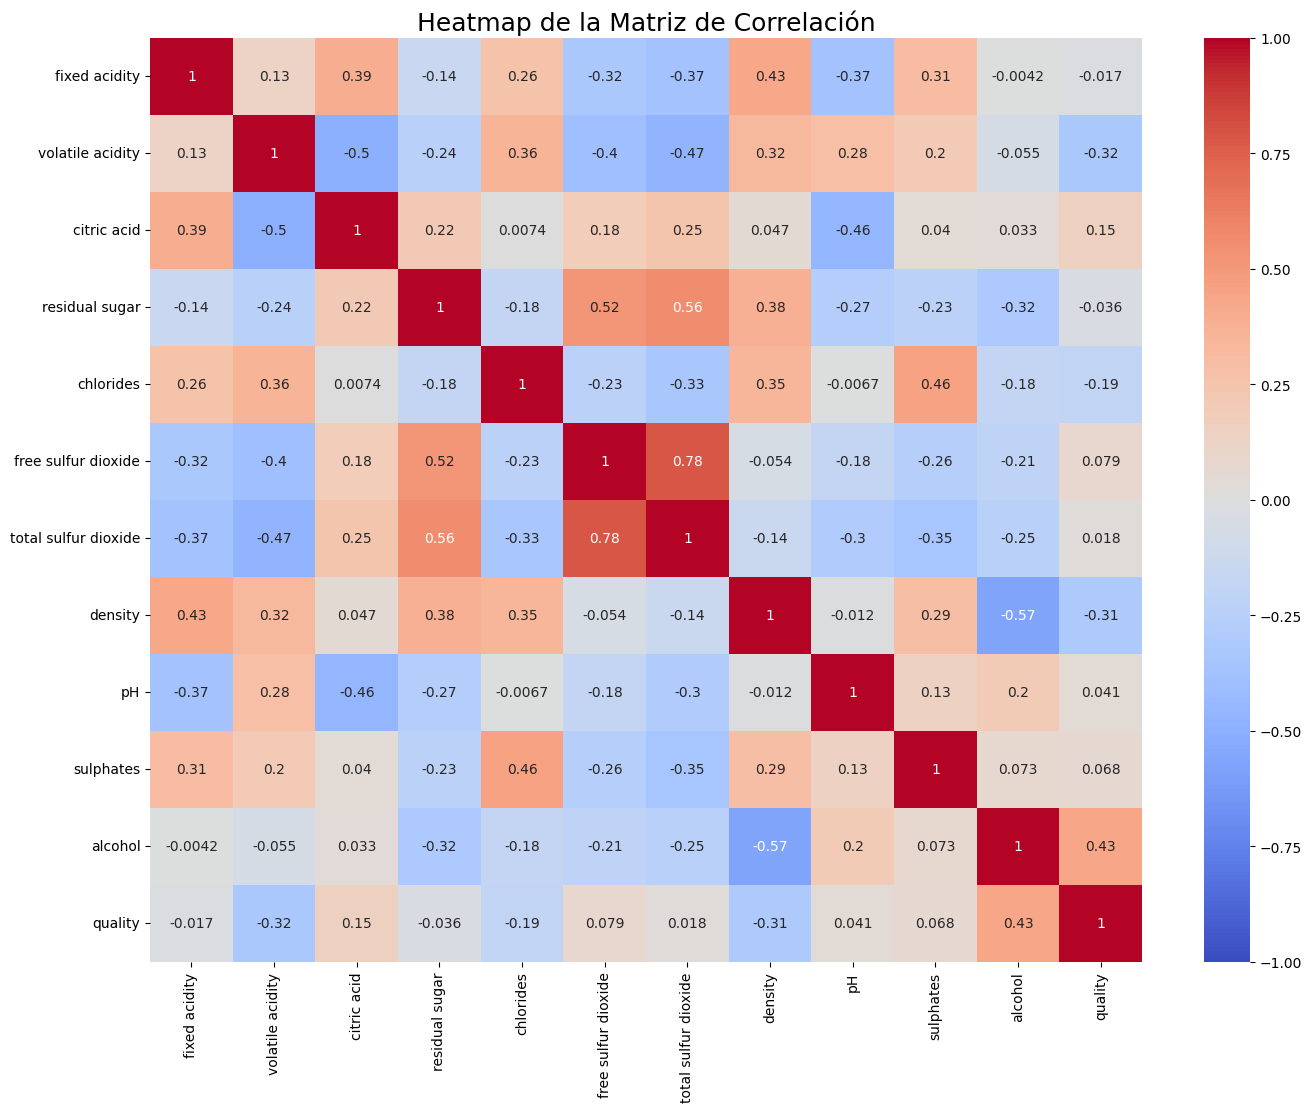

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación', fontsize=18)
plt.show()

La matriz de correlacion no nos da resultados claros, todas las correlaciones estan por debajo de una correlacion alta aceptable (son menores a 0,7), salvo por la que se da entre el free sulfur dioxide y el total sulfur dioxide. Pero, esta correlación no nos es útil para plantear nada entre ellas ya que es logico que esten relacionadas porque la cantidad de dioxido de azufre total se conforma de la suma del dioxido de azufre libre y el dioxido de azufre que reacciono para formar otros compuestos.

Agregamos la columna 'quality_group' donde agrupamos la variable calidad en 3 subconjuntos: Baja, Media y Alta ya que es mejor hacer el analisis de esta forma.  

In [409]:
# Crear una copia del DataFrame
winesDf_copy = winesDf.copy()

# Añadir la columna 'quality_group' en la copia
winesDf_copy['quality_group'] = pd.cut(winesDf_copy['quality'], 
                                       bins=[0, 5, 7, 10], 
                                       labels=['Baja', 'Media', 'Alta'])

# de 0 a 4 CALIDAD BAJA
# de 5 a 6 CALIDAD MEDIA
# de 7 a 10 CALIDAD ALTA

Mostramos la cantidad de datos que hay en cada subgrupo. Notamos que se ditribuyen mayormente entre Baja y Media.

In [410]:
winesDf_copy['quality_group'].value_counts()

quality_group
Media    1836
Baja     1305
Alta       91
Name: count, dtype: int64

# Hipotesis <a id="hip"></a>
Se realiza estudio de hipotesis

### Hipotesis 1: <a id="hip1"></a>

#### La calidad de un vino esta dada de manera independiente al volumen alcoholico del mismo, se dice que este es un valor objetivo y no se utiliza como un factor relevante a la hora de asignar la calidad

Para analizar la hipotesis propuesta generamos un boxplot entre los quality_group y el alcohol para ver si a simple vista conseguimos ver alguna diferencia entre los conjuntos con respecto a la calidad

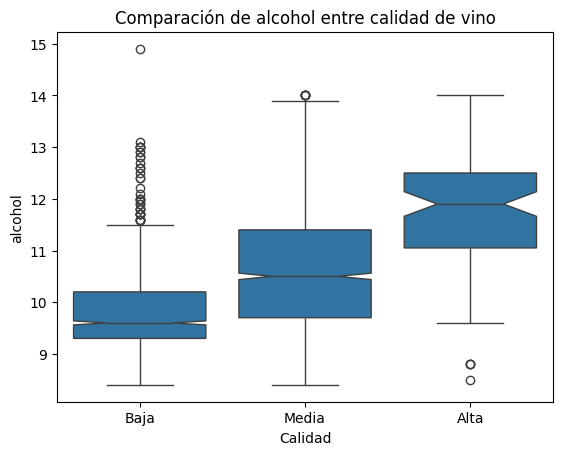

In [411]:
sns.boxplot(x='quality_group', y='alcohol', data=winesDf_copy, notch=True)
plt.title('Comparación de alcohol entre calidad de vino')
plt.xlabel('Calidad')
plt.ylabel('alcohol')
plt.show()

A simple vista se ve que es posible ya que no pareciera que coincidan los "acogotamientos" y claramente pareciera haber una diferencia a simple vista, por lo que es de interes intentar realizar un test para corroborar si esta diferencia es significante o no

Comenzamos probando normalidad mediante Shaphiro-Wilk: 

In [412]:
# Separamos los datos por los quality group utilizando la columna alcohol
vino_q_baja = winesDf_copy[winesDf_copy['quality_group'] == 'Baja']['alcohol']
vino_q_media = winesDf_copy[winesDf_copy['quality_group'] == 'Media']['alcohol']
vino_q_alta = winesDf_copy[winesDf_copy['quality_group'] == 'Alta']['alcohol']

# Test de Shapiro-Wilk para vinos de calidad baja:
stat, p = shapiro(vino_q_baja)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de calidad media
stat, p = shapiro(vino_q_media)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de calidad alta
stat, p = shapiro(vino_q_alta)
print(f"Test de Shapiro-Wilk para vinos Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Q baja: Estadístico=0.912, p-valor=0.000
Test de Shapiro-Wilk para vinos Q media: Estadístico=0.973, p-valor=0.000
Test de Shapiro-Wilk para vinos Q alta: Estadístico=0.942, p-valor=0.000


El p valor nos da por debajo de 0,05 por lo que no hay normalidad, por ende no puedo utilizar test-t ni ningun tipo de test parametrico.

Intentaremos entonces aplicar el U-test y para esto necesitamos homocedasticidad por lo que aplicamos el test de levene para comprobarlo: 

In [413]:
stat, p = stats.levene(vino_q_baja, vino_q_media)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_q_baja, vino_q_alta)
print(f"Test de Levene para baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_q_media, vino_q_alta)
print(f"Test de Levene para media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")



Test de Levene para baja-media: Estadístico=218.876, p-valor=0.000
Test de Levene para baja-alta: Estadístico=19.398, p-valor=0.000
Test de Levene para media-alta: Estadístico=0.521, p-valor=0.470


El unico grupo que resulto homocedastico es el de media-alta por lo que procedo a aplicarle el test Mann-Whitney U

Mientras que para los otros dos casos (baja-media y baja-alta) no presentan homocedasticidad por lo tanto utilizamos Kruskal-Wallis

In [414]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(vino_q_media, vino_q_alta)
print(f"Test de Mann-Whitney U para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

print("-------------------------------------------------------------------------------")

# Test de Kruskal-Wallis para comparar el contenido de alcohol entre vinos calidad baja y media
stat, p = stats.kruskal(vino_q_baja, vino_q_media)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

print("-------------------------------------------------------------------------------")

# Test de Kruskal-Wallis para comparar el contenido de alcohol entre vinos calidad baja y alta
stat, p = stats.kruskal(vino_q_baja, vino_q_alta)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

Test de Mann-Whitney U para Population_mln: Estadístico=40099.500, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en los vinos de calidad media y alta.
-------------------------------------------------------------------------------
Test de Kruskal-Wallis para GDP_per_capita: Estadístico=406.317, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en los vinos de calidad media y alta.
-------------------------------------------------------------------------------
Test de Kruskal-Wallis para GDP_per_capita: Estadístico=163.623, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en los vinos de calidad media y alta.


#### CONCLUSION:

##### Mediante este test concluimos que efectivamente hay una diferencia significativa entre el alcohol y las distintas calidades de vinos.

##### Esto nos da evidencia para confirmar que a mayor contenido de alcohol tendremos una calidad mas alta como podiamos observar en un principio en el boxplot.


### Hipótesis 2: Relación entre variables <a id="hip2"></a>

Hipotesis 2: los factores que caracterizan a un vino deberian ser distintos en dependencia del tipo de vino.

BUSCAMOS DIFERENTES FACTORES QUE INFLUYAN A QUE UN VINO SEA DE UN TIPO O DE OTRO.


Utilizamos regresion logistica sobre nuestro dataset, tomando la variable 'type' como objetivo, la cual asignamos 1 al tipo Riesling y 0 al tipo Garnacha.

Dividimos los datos en particiones para entrenamiento y test.

Hacemos la estandarización de los datos para evitar que las diferencias de rango de las distintas variables puedan afectar a los pesos que ajusta el modelo.

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(winesDf_copy['type'].value_counts())

# Variables predictoras y variable objetivo
X1 = winesDf_copy[['volatile acidity','citric acid','residual sugar', 'fixed acidity', 'pH','chlorides','free sulfur dioxide','total sulfur dioxide', 'alcohol', 'sulphates','density']]  # características importantes
y1 = winesDf_copy['type']


# Inicializar el codificador
label_encoder = LabelEncoder()

# Convertir 'type' (Garnacha y Riesling) a etiquetas 0 y 1
y1 = label_encoder.fit_transform(winesDf_copy['type'])

# Mostrar los valores codificados
print(y1)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=10)


print(f"Tamaño del conjunto de entrenamiento: {X1_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X1_test.shape[0]} muestras")

# Ajustar StandardScaler sobre X_train
scaler = StandardScaler()
scaler.fit(X1_train)

# Estandarizar X_train y X_test usando el scaler ajustado
X1_train_stand = scaler.transform(X1_train)
X1_test_stand = scaler.transform(X1_test)


type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64
[1 1 1 ... 0 0 0]
Tamaño del conjunto de entrenamiento: 2262 muestras
Tamaño del conjunto de prueba: 970 muestras


Entrenamos el modelo 

In [416]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
logistic_model1 = LogisticRegression(penalty=None, random_state=10)

# Entrenar el modelo con los datos de entrenamiento estandarizados
logistic_model1.fit(X1_train_stand, y1_train)

LogisticRegression(penalty=None, random_state=10)

Usamos cross validation como método de evaluación. Cuando lo llamamos, corre cross validation según el número de folds indicados, y nos reporta la performance obtenida en cada subconjunto. Después, nosotros podemos calcular el promedio de ese rendimiento (y el desvío!), y podemos usar esa medida como representativa de la performance que obtenemos entrenando el modelo sobre todo el conjunto de entrenamiento.

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Crear un modelo de Regresión Logística baseline
baseline_logistic_model = LogisticRegression(penalty=None, random_state=10)

# Realizar la validación cruzada y calcular la precisión
cv_scores = cross_val_score(baseline_logistic_model, X1_train_stand, y1_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Exactitud en cada fold:", cv_scores)
print("Exactitud promedio:", cv_scores.mean())
print("Desvío de la Exactitud:", cv_scores.std())

# Dejamos el modelo entrenado al final
baseline_logistic_model.fit(X1_train_stand, y1_train)

Exactitud en cada fold: [0.99116998 0.98675497 0.98451327 0.98672566 0.99115044]
Exactitud promedio: 0.988062865068667
Desvío de la Exactitud: 0.002656523443707706


LogisticRegression(penalty=None, random_state=10)

Ajustemos hiperparámetros usando GridSearchCV

In [418]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de alpha que queremos probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crear un modelo de Regresión Logística
logistic_model1 = LogisticRegression(penalty='l2', max_iter=1000, random_state=10)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(logistic_model1, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X1_train_stand, y1_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
# Imprimir la mejor exactitud encontrada
print("Mejor exactitud:", grid_search.best_score_)

Mejores parámetros: {'C': 1}
Mejor exactitud: 0.988062865068667


In [419]:
# Obtener el mejor modelo
best_logistic_model = grid_search.best_estimator_

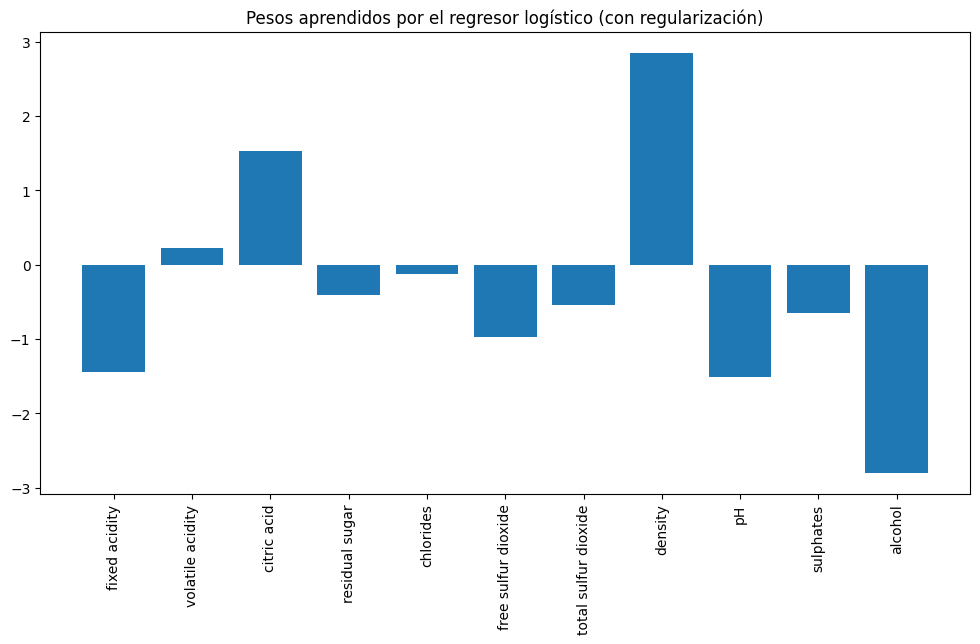

In [420]:
columnas = [ 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Recuperamos los coeficientes del modelo logístico
best_theta_logistic = best_logistic_model.coef_

# Graficamos los coeficientes del modelo logístico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, best_theta_logistic.size), np.squeeze(best_theta_logistic))
labels = columnas
ax.set_xticks(np.arange(0, best_theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico (con regularización)')
plt.show()

Por último, vamos a comparar el rendimiento de los dos modelos (el baseline y el best model obtenido mediante grid_search) sobre los datos de test, usando tanto accuracy como una matriz de confusión.

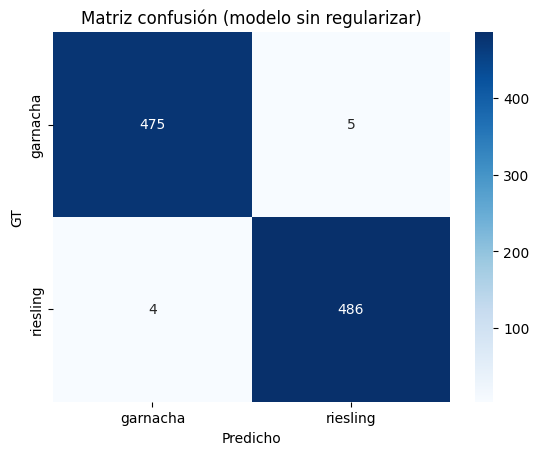

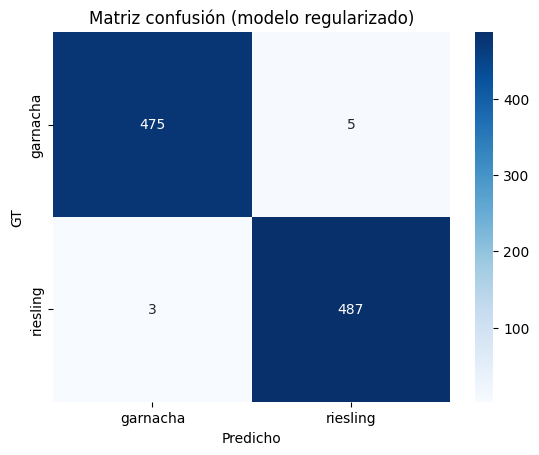

Exactitud del modelo original: 0.9907216494845361
Exactitud del mejor modelo regularizado: 0.9917525773195877


In [421]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

target_names = ['garnacha', 'riesling']

# Predecir con el modelo original en X_test_stand
y1_pred_original = baseline_logistic_model.predict(X1_test_stand)

# Calcular la exactitud y la matriz de confusión del modelo original
accuracy_original = accuracy_score(y1_test, y1_pred_original)
confusion_matrix_original = confusion_matrix(y1_test, y1_pred_original)
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión (modelo sin regularizar)')
plt.show()

# Predecir con el mejor modelo regularizado en X_test_stand
y1_pred_best = best_logistic_model.predict(X1_test_stand)

# Calcula la exactitud y la matriz de confusión del mejor modelo regularizado  
accuracy_best = accuracy_score(y1_test, y1_pred_best)
confusion_matrix_best = confusion_matrix(y1_test, y1_pred_best)
sns.heatmap(confusion_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión (modelo regularizado)')
plt.show()


print("Exactitud del modelo original:", accuracy_original)
print("Exactitud del mejor modelo regularizado:", accuracy_best)

In [422]:
from sklearn.metrics import classification_report

# Genera un informe de clasificación
print(classification_report(y1_test, y1_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       480
           1       0.99      0.99      0.99       490

    accuracy                           0.99       970
   macro avg       0.99      0.99      0.99       970
weighted avg       0.99      0.99      0.99       970



Coeficientes del modelo:

Los coeficientes de la regresión logística te indican la importancia relativa de cada característica en la predicción. Si un coeficiente es muy grande o pequeño, significa que esa característica tiene una influencia considerable sobre la probabilidad de que un vino pertenezca a una clase determinada.

Si el coeficiente de una característica es positivo, significa que a medida que aumenta el valor de esa característica, la probabilidad de que el vino pertenezca a la clase predicha también aumenta.


Si el coeficiente es negativo, significa que a medida que esa característica aumenta, la probabilidad de que el vino pertenezca a la clase predicha disminuye.

In [423]:
# Mostrar los coeficientes del modelo
coef = best_logistic_model.coef_[0]
feature_names = X1_train.columns  
coef_df = pd.DataFrame(coef, index=feature_names, columns=['Coeficiente'])
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)  # Ordena por valor absoluto
print(coef_df)

                      Coeficiente
total sulfur dioxide     2.850119
residual sugar           1.526008
citric acid              0.226351
pH                      -0.129855
fixed acidity           -0.407679
free sulfur dioxide     -0.547229
sulphates               -0.651030
chlorides               -0.971423
volatile acidity        -1.444891
alcohol                 -1.508963
density                 -2.802437


Para interpretar los coeficientes, los convertimos en odds ratios, que son más fáciles de interpretar.

Los odds ratios representan el cambio en las probabilidades de pertenecer a una clase por cada unidad de cambio en la característica.

Un odds ratio mayor que 1 indica que la característica aumenta las probabilidades de la clase, mientras que un odds ratio menor que 1 indica que las probabilidades disminuyen.

In [424]:
# Calcular los odds ratios
odds_ratios = np.exp(coef)
odds_ratios_df = pd.DataFrame(odds_ratios, index=feature_names, columns=['Odds Ratio'])
odds_ratios_df = odds_ratios_df.sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios_df)

                      Odds Ratio
total sulfur dioxide   17.289843
residual sugar          4.599776
citric acid             1.254016
pH                      0.878223
fixed acidity           0.665192
free sulfur dioxide     0.578551
sulphates               0.521508
chlorides               0.378544
volatile acidity        0.235772
alcohol                 0.221139
density                 0.060662


ANALISIS DE LOS RESULTADOS OBTENIDOS:

-------------------------------------------------------------------------------------------------------------------------------------------------

total sulfur dioxide: Un coeficiente positivo (2.85) significa que un aumento en el dióxido de azufre total aumenta la probabilidad de que el vino sea Riesling (1).

residual sugar: Un coeficiente positivo (1.53) sugiere que a mayor cantidad de azúcar residual, hay más probabilidad de que el vino sea Riesling.

citric acid: Un coeficiente positivo (0.23) sugiere que el aumento en el ácido cítrico aumenta la probabilidad de que el vino sea Riesling.

alcohol: Un coeficiente negativo (-1.51) significa que a mayor cantidad de alcohol, disminuye la probabilidad de que el vino sea Riesling, es decir, la presencia de alcohol más alto favorece a Garnacha.

density: Un coeficiente muy negativo (-2.80) significa que a mayor densidad, disminuye la probabilidad de que el vino sea Riesling.

-------------------------------------------------------------------------------------------------------------------------------------------------

total sulfur dioxide (17.29): Aumentar el dióxido de azufre total en una unidad hace que la probabilidad de que el vino sea Riesling sea 17.29 veces mayor.

residual sugar (4.60): Aumentar el azúcar residual hace que la probabilidad de que el vino sea Riesling sea 4.6 veces mayor.

citric acid (1.25): Un aumento en el ácido cítrico hace que la probabilidad de que el vino sea Riesling sea 1.25 veces mayor.

alcohol (0.22): A mayor alcohol, la probabilidad de que el vino sea Riesling disminuye considerablemente, ya que el odds ratio es menor que 1.

density (0.06): A mayor densidad, la probabilidad de que el vino sea Riesling disminuye aún más, dado que el odds ratio es muy pequeño.

-------------------------------------------------------------------------------------------------------------------------------------------------



A partir de los resultados obtenidos planteamos las siguiente hipotesis:

Hipotesis 2.1: Las variables total sulfur dioxide, residual sugar, y citric acid aumentan la probabilidad de que el vino sea Riesling.

Hipotesis 2.2: Mientras que las variables alcohol y density favorecen la clasificación de Garnacha. 

Esto te permite comprender qué variables son más importantes para clasificar el vino, y cómo su presencia o ausencia afecta la predicción de la clase.

-------------------------------------------------------------------------------------------------------------------------------------------------

Seguimos analizando las variables para verificar las hipotesis

Miramos los boxplots de las variables (que consideramos mas importantes) con respecto al tipo 

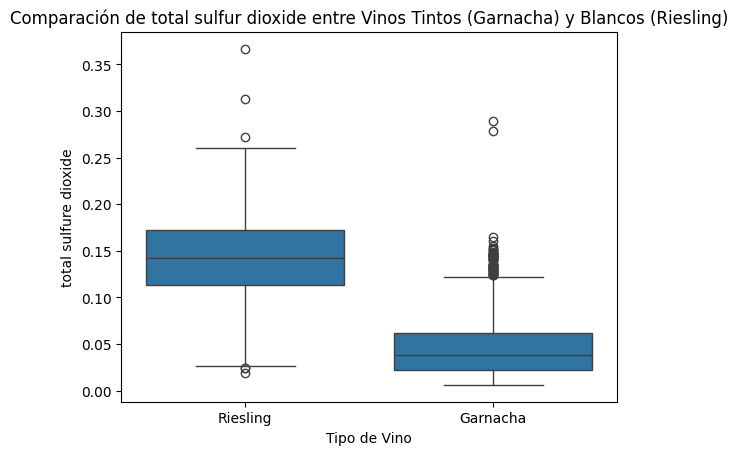

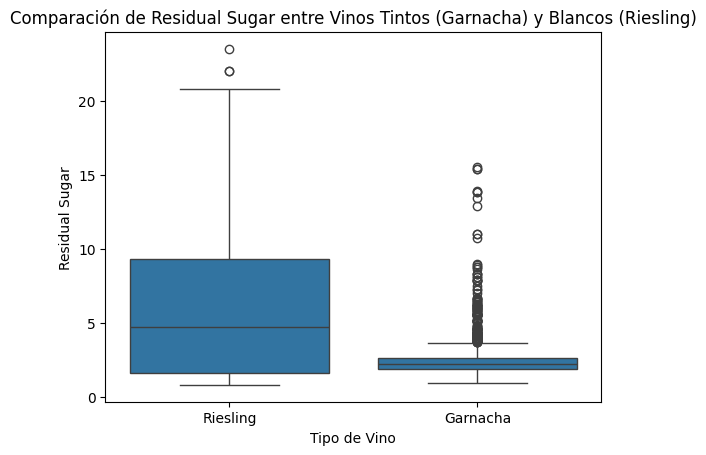

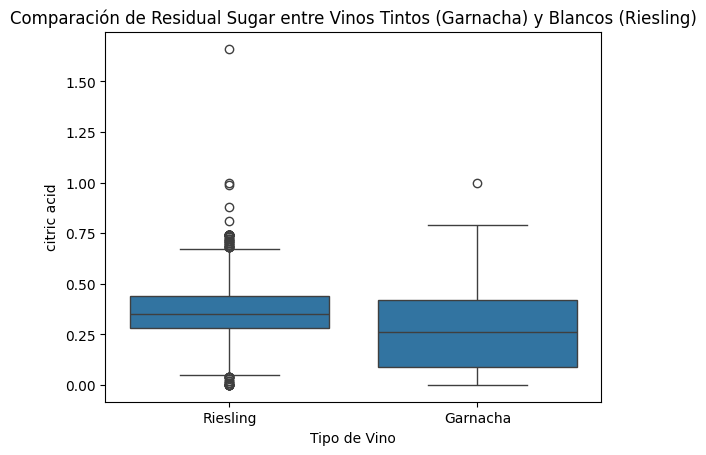

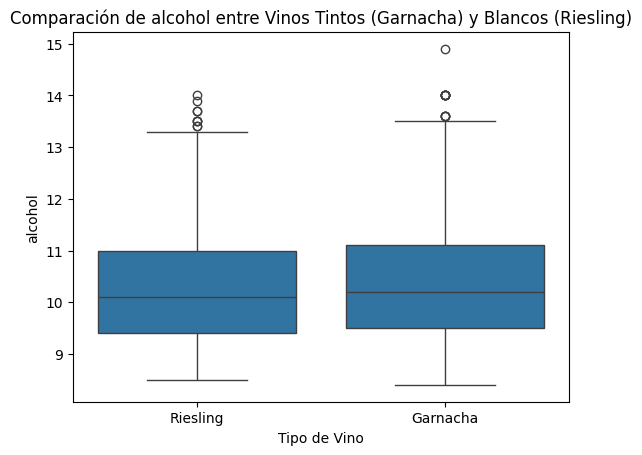

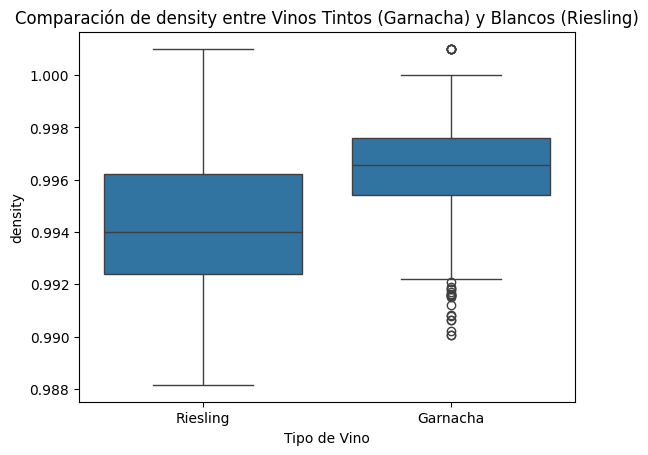

In [451]:
# Creamos los boxplots para comparar por cada variable en ambos tipos de vino

# Variable: total sulfur dioxide
sns.boxplot(x='type', y='total sulfur dioxide', data=winesDf_copy)
plt.title('Comparación de total sulfur dioxide entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('total sulfure dioxide')
plt.show()

# Variable: residual sugar
sns.boxplot(x='type', y='residual sugar', data=winesDf_copy)
plt.title('Comparación de Residual Sugar entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('Residual Sugar')
plt.show()

# Variable: citric acid
sns.boxplot(x='type', y='citric acid', data=winesDf_copy)
plt.title('Comparación de Residual Sugar entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('citric acid')
plt.show()

# Variable: alcohol
sns.boxplot(x='type', y='alcohol', data=winesDf_copy)
plt.title('Comparación de alcohol entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('alcohol')
plt.show()

# Variable: density
sns.boxplot(x='type', y='density', data=winesDf_copy)
plt.title('Comparación de density entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('density')
plt.show()

Probamos por tests parametricos para validar las hipotesis

Probamos normalidad mediante el test de Shapiro-Wilk, para ver si podemos usar Test-T

In [426]:
# Separamos los datos en dos grupos,garnacha y riesling

tintos = winesDf_copy[winesDf_copy['type'] == 'Garnacha']['total sulfur dioxide']
blancos = winesDf_copy[winesDf_copy['type'] == 'Riesling']['total sulfur dioxide']

# Test de Shapiro-Wilk para tintos
stat, p = shapiro(tintos)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para blancos
stat, p = shapiro(blancos)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Q baja: Estadístico=0.873, p-valor=0.000
Test de Shapiro-Wilk para vinos Q media: Estadístico=0.995, p-valor=0.000


Vimos que el P-valor nos dio menor a 0.05 por ende no tenemos normalidad.

Probamos homocedasticidad (por las dudas?)

In [427]:
stat, p = stats.levene(tintos, blancos)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para baja-media: Estadístico=164.534, p-valor=0.000


No tenemos normalidad ni homocedasticidad. Por lo tanto no podemos usar test-t.

Utilizamos el test llamado Kruskal-wallis 

In [428]:
# Test de Kruskal-Wallis para comparar el total sulfur dioxide entre vinos garnacha y riesling
stat, p = stats.kruskal(tintos, blancos)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el total sulfur dioxide entre vinos riesling y garnacha.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el tota sulfur dioxide entre vinos riesling y garnacha.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=2022.640, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el tota sulfur dioxide entre vinos riesling y garnacha.


PARA EL CASO DEL ALCOHOL, PODEMOS OBSERVAR EN EL BOXPLOT QUE PARECIERA NO HABER DIFERENCIAS ENTRE TIPOS LOS TIPOS, AUN ASI PROBAMOS MEDIANTE LOS TEST

Probamos normalidad mediante Shapiro-Wilk

In [429]:
# Separamos los datos en dos grupos,garnacha y riesling, y comparamos por la variable alcohol

tintosALC = winesDf_copy[winesDf_copy['type'] == 'Garnacha']['alcohol']
blancosALC = winesDf_copy[winesDf_copy['type'] == 'Riesling']['alcohol']

# Test de Shapiro-Wilk para tintos
stat, p = shapiro(tintosALC)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para blancos
stat, p = shapiro(blancosALC)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Q baja: Estadístico=0.930, p-valor=0.000
Test de Shapiro-Wilk para vinos Q media: Estadístico=0.946, p-valor=0.000


In [430]:
stat, p = stats.levene(tintosALC, blancosALC)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para baja-media: Estadístico=6.770, p-valor=0.009


Como no nos dio homocedasticidad, probamos con el Test de Kruskal-Wallis

In [431]:
# Test de Kruskal-Wallis para comparar el alcohol entre vinos garnacha y riesling
stat, p = stats.kruskal(tintosALC, blancosALC)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el contenido de alcohol entre vinos riesling y garnacha.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el contenido de alcohol entre vinos riesling y garnacha.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=17.721, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el contenido de alcohol entre vinos riesling y garnacha.


#### CONCLUSION:

##### Por lo tanto, obtuvimos evidencia para confirmar que las hipotesis se cumplen.

##### Logramos obtener variables e identificar cuales son más importantes para clasificar el vino, y cómo su presencia o ausencia afecta la predicción.

### Hipótesis 3: <a id="hip3"></a>

El ácido cítrico no impacta en la calidad del vino de la misma manera para los distintos tipos

##### Distribución ácido cítrico entre las calidades del vino, diferenciando por tipo de vino

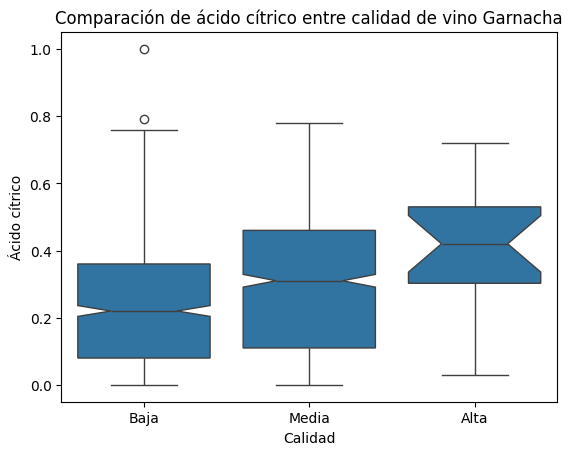

0.237755376344086
0.297921146953405
0.3911111111111111


In [432]:
# Boxplot para comparar la distribución de ácido cítrico entre las distintas calidades en vinos Garnacha
winesDf_copyGarnacha = winesDf_copy[winesDf_copy['type'] == 'Garnacha']

sns.boxplot(x='quality_group', y='citric acid', data=winesDf_copyGarnacha, notch=True)
plt.title('Comparación de ácido cítrico entre calidad de vino Garnacha')
plt.xlabel('Calidad')
plt.ylabel('Ácido cítrico')
plt.show()

vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['citric acid']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['citric acid']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['citric acid']

print(vino_baja_g.mean())
print(vino_media_g.mean())
print(vino_alta_g.mean())

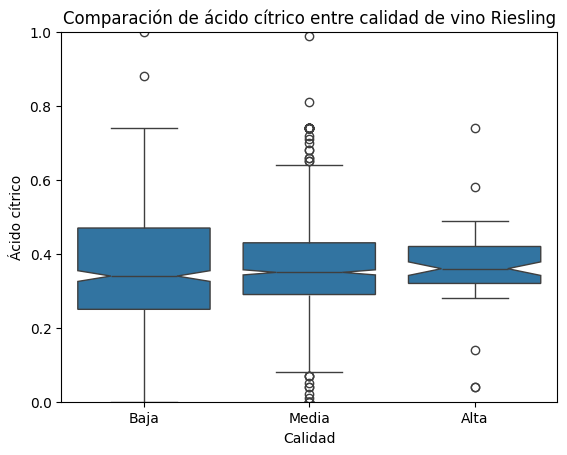

0.36178253119429593
0.3672472472472472
0.36657534246575346


In [433]:
# Boxplot para comparar la distribución de ácido cítrico entre las distintas calidades en vinos Riesling
winesDf_copyRiesling = winesDf_copy[winesDf_copy['type'] == 'Riesling']

sns.boxplot(x='quality_group', y='citric acid', data=winesDf_copyRiesling, notch=True)
plt.title('Comparación de ácido cítrico entre calidad de vino Riesling')
plt.xlabel('Calidad')
plt.ylabel('Ácido cítrico')
plt.ylim(0,1)
plt.show()

vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['citric acid']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['citric acid']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['citric acid']

print(vino_baja_r.mean())
print(vino_media_r.mean())
print(vino_alta_r.mean())

#### Vinos Garnacha

##### Analizamos normalidad de los datos

In [434]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['citric acid']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['citric acid']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['citric acid']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico=0.944, p-valor=0.000
Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico=0.957, p-valor=0.000
Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico=0.954, p-valor=0.494


In [435]:
# Test de Kolmogorov-Smirnov vinos Garnacha de calidad alta
stat, p = kstest(vino_alta_g, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos Garnacha alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Kolmogorov-Smirnov para vinos Garnacha alta: Estadístico=0.512, p-valor=0.000


##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [436]:
stat, p = stats.levene(vino_baja_g, vino_media_g)
print(f"Test de Levene para Garnacha baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_g, vino_alta_g)
print(f"Test de Levene para Garnacha baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_g, vino_alta_g)
print(f"Test de Levene para Garnacha media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Garnacha baja-media: Estadístico=14.872, p-valor=0.000
Test de Levene para Garnacha baja-alta: Estadístico=0.186, p-valor=0.667
Test de Levene para Garnacha media-alta: Estadístico=0.145, p-valor=0.703


##### Hay homocedasticidad : baja-media

##### No hay homocedasticidad : baja-alta y media-alta

In [437]:
# Test de Kruskal-Wallis para comparar ácido cítrico entre calidad baja y media de vinos Garnacha
stat, p = stats.kruskal(vino_baja_g, vino_media_g)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y media.")

Test de Kruskal-Wallis para acido cítrico entre calidades de vino Garnacha: Estadístico=37.110, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y media.


In [438]:
# Test de Mann-Whitney U para comparar ácido cítrico entre calidad baja y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido cítrico entre calidad media y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_media_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad media y alta.")

Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico=3654.500, p-valor=0.001
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y alta.
Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico=5445.000, p-valor=0.044
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad media y alta.


#### Vinos Riesling

##### Analizamos normalidad de los datos

In [439]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['citric acid']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['citric acid']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['citric acid']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico=0.978, p-valor=0.000
Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico=0.905, p-valor=0.000
Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico=0.888, p-valor=0.000


##### Concluimos no hay normalidad en los datos

##### Analizamos homocedasticidad

In [440]:
stat, p = stats.levene(vino_baja_r, vino_media_r)
print(f"Test de Levene para Riesling baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_r, vino_alta_r)
print(f"Test de Levene para Riesling baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_r, vino_alta_r)
print(f"Test de Levene para Riesling media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Riesling baja-media: Estadístico=53.845, p-valor=0.000
Test de Levene para Riesling baja-alta: Estadístico=24.594, p-valor=0.000
Test de Levene para Riesling media-alta: Estadístico=5.054, p-valor=0.025


##### Obtuvimos un p-valor menor a 0.05, por ende tenemos datos que no son homocedasticos!

In [441]:
# Test de Kruskal-Wallis para comparar para comparar ácido cítrico entre calidad baja y alta de vinos Riesling
stat, p = stats.kruskal(vino_baja_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y media.")
print("---------------------------------------------------------------------------------------------")

stat, p = stats.kruskal(vino_baja_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y alta.")
print("---------------------------------------------------------------------------------------------")

stat, p = stats.kruskal(vino_media_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")
print("---------------------------------------------------------------------------------------------")

Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico=1.240, p-valor=0.265
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en los vinos de calidad baja y media.
---------------------------------------------------------------------------------------------
Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico=1.240, p-valor=0.265
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en los vinos de calidad baja y alta.
---------------------------------------------------------------------------------------------
Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico=0.682, p-valor=0.409
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en los vinos de calidad media y alta.
---------------------------------------------------------------------------------

CONCLUSIÓN: Logramos obtener evidencia para confirmar nuestra hipotesis, es decir, como observamos en el boxplot se cumple que en los vinos garnacha un mayor contenido de citric acid influye para tener una calidad alta. Mientras que en los vinos Riesling no varia el citric acid con respecto a la calidad.

### Hipótesis 4: <a id="hip4"></a>

El ácido volátil no impacta en la calidad del vino de la misma manera para los distintos tipos

##### Distribución ácido volátil entre las calidades del vino, diferenciando por tipo de vino

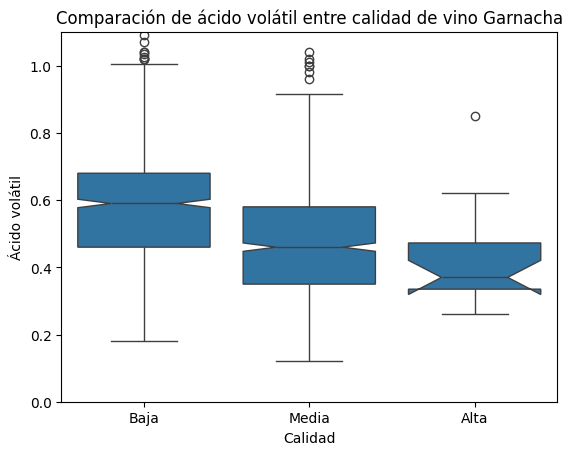

0.589502688172043
0.4752389486260454
0.4233333333333334


In [442]:
# Boxplot para comparar la distribución de ácido volatil entre las distintas calidades en vinos Garnacha
winesDf_copyGarnacha = winesDf_copy[winesDf_copy['type'] == 'Garnacha']


sns.boxplot(x='quality_group', y='volatile acidity', data=winesDf_copyGarnacha, notch=True)
plt.title('Comparación de ácido volátil entre calidad de vino Garnacha')
plt.xlabel('Calidad')
plt.ylabel('Ácido volátil')
plt.ylim(0,1.1)
plt.show()

vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['volatile acidity']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['volatile acidity']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['volatile acidity']

print(vino_baja_g.mean())
print(vino_media_g.mean())
print(vino_alta_g.mean())

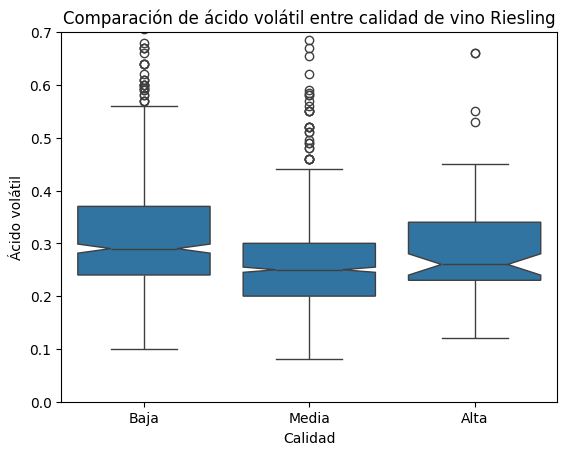

0.31749554367201427
0.25811811811811813
0.29164383561643836


In [443]:
# Boxplot para comparar la distribución de ácido volátil entre las distintas calidades en vinos Riesling
winesDf_copyRiesling = winesDf_copy[winesDf_copy['type'] == 'Riesling']


sns.boxplot(x='quality_group', y='volatile acidity', data=winesDf_copyRiesling, notch=True)
plt.title('Comparación de ácido volátil entre calidad de vino Riesling')
plt.xlabel('Calidad')
plt.ylabel('Ácido volátil')
plt.ylim(0,0.7)
plt.show()

vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['volatile acidity']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['volatile acidity']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['volatile acidity']

print(vino_baja_r.mean())
print(vino_media_r.mean())
print(vino_alta_r.mean())

#### Vinos Garnacha

##### Analizamos normalidad de los datos

In [444]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['volatile acidity']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['volatile acidity']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['volatile acidity']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico=0.965, p-valor=0.000
Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico=0.979, p-valor=0.000
Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico=0.834, p-valor=0.005


##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [445]:
stat, p = stats.levene(vino_baja_g, vino_media_g)
print(f"Test de Levene para Garnacha baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_g, vino_alta_g)
print(f"Test de Levene para Garnacha baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_g, vino_alta_g)
print(f"Test de Levene para Garnacha media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Garnacha baja-media: Estadístico=0.179, p-valor=0.672
Test de Levene para Garnacha baja-alta: Estadístico=1.738, p-valor=0.188
Test de Levene para Garnacha media-alta: Estadístico=2.274, p-valor=0.132


##### Hay homoceidad : baja-media, baja-alta y media-alta

In [446]:
# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y media de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_media_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y media.")

# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido volátil entre calidad media y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_media_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad media y alta.")

Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico=428253.000, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y media.
Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico=10659.000, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y alta.
Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico=9181.500, p-valor=0.112
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad media y alta.


### En los vinos Garnacha encontramos suficiente evidencia para decir que la cantidad de ácido volátil es inversamente proporcional a la calidad del vino.

#### Vinos Riesling

##### Analizamos normalidad de los datos

In [447]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['volatile acidity']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['volatile acidity']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['volatile acidity']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico=0.913, p-valor=0.000
Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico=0.931, p-valor=0.000
Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico=0.877, p-valor=0.000


##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [448]:
stat, p = stats.levene(vino_baja_r, vino_media_r)
print(f"Test de Levene para Riesling baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_r, vino_alta_r)
print(f"Test de Levene para Riesling baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_r, vino_alta_r)
print(f"Test de Levene para Riesling media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Riesling baja-media: Estadístico=32.414, p-valor=0.000
Test de Levene para Riesling baja-alta: Estadístico=1.222, p-valor=0.269
Test de Levene para Riesling media-alta: Estadístico=1.564, p-valor=0.211


##### Hay homoceidad : baja-alta, media-alta

##### No hay homoceidad : baja-media

In [449]:
# Test de Kruskal-Wallis para comparar para comparar ácido volátil entre calidad baja y media de vinos Riesling
stat, p = stats.kruskal(vino_baja_r, vino_media_r)
print(f"Test de Kruskal-Wallis para ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y media.")

Test de Kruskal-Wallis para ácido volátil entre calidades de vino Riesling: Estadístico=115.465, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en los vinos de calidad baja y media.


In [450]:
# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y alta de vinos Riesling
stat, p = stats.mannwhitneyu(vino_baja_r, vino_alta_r)
print(f"Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido volátil entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido volátil entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido volátil entre calidad media y alta de vinos Riesling
stat, p = stats.mannwhitneyu(vino_media_r, vino_alta_r)
print(f"Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido volátil entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido volátil entre los vinos de calidad media y alta.")

Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico=23671.500, p-valor=0.030
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el ácido volátil entre los vinos de calidad baja y alta.
Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico=29567.000, p-valor=0.007
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el ácido volátil entre los vinos de calidad media y alta.


 Para el caso de los vinos Riesling, si bien se encontró que existen diferencias significativas entre los grupos, y que una gran cantidad de ácido volátil puede indicar un vino de menor calidad, no se observa lo inverso cuando la cantidad de ácido es menor como si ocurre en los vinos de tipo Garnacha.

CONCLUSIÓN: 

Logramos obtener evidencia para confirmar nuestra hipotesis, es decir, como observamos en el boxplot la calidad del vino se comporta de distinta manera según el tipo de vino. Vemos que en los vinos de tipo Garnacha la cantidad de ácido volátil es inversa a la calidad, mientras que en los de tipo Riesling no se observa la misma tendencia.